In [781]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score



In [782]:
data  = pd.read_csv('data/water_potability.csv')


col = data.columns


data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [783]:
data.Potability.value_counts()



0    1998
1    1278
Name: Potability, dtype: int64

In [803]:
from sklearn.preprocessing import StandardScaler
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

scaler = StandardScaler()

std = 2.0                   ##### 이상치 표준편차로  2.2 넘어가면 모두 NaN 로 반환 >> 3 일시 99퍼  2일시는 몇퍼더라 까먹음 

notpotable_scaled = scaler.fit_transform(notpotable)
potable_scaled = scaler.fit_transform(potable)

potable_scaled = pd.DataFrame(potable_scaled,columns = col)
notpotable_scaled = pd.DataFrame(notpotable_scaled,columns = col)


potable_outlier =  abs(potable_scaled) >=std
notpotable_outlier =  abs(notpotable_scaled) >=std

potable_outlier= potable_outlier.replace(True,np.NaN)
potable_outlier =potable_outlier.replace(False,0)

notpotable_outlier= notpotable_outlier.replace(True,np.NaN)
notpotable_outlier =notpotable_outlier.replace(False,0)

               
potable_scaled = potable_scaled*0
potable_outlier = potable_scaled*0+potable_outlier

notpotable_scaled = notpotable_scaled*0
notpotable_outlier = notpotable_scaled*0+notpotable_outlier



potable = potable.reset_index()
notpotable = notpotable.reset_index()

potable = potable.drop(columns=['index'], axis = 1) + potable_outlier
notpotable = notpotable.drop(columns=['index'], axis = 1) +notpotable_outlier




In [804]:
from sklearn.utils import shuffle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer,SimpleImputer
  

col = data.columns


imputer = SimpleImputer(strategy="most_frequent")

potable_imp =imputer.fit_transform(potable)
notpotable_imp =imputer.fit_transform(notpotable) 

potable_imp = pd.DataFrame(potable_imp,columns = col)
notpotable_imp= pd.DataFrame(notpotable_imp,columns = col)

data = pd.concat([notpotable_imp,potable_imp])
data = data.reset_index()



data = pd.DataFrame(data,columns = col)

data = shuffle(data)
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.037959
ph                 0.037309
Chloramines        0.036404
Trihalomethanes    0.005679
Turbidity         -0.006003
Conductivity      -0.014150
Organic_carbon    -0.031018
Hardness          -0.032975
Sulfate           -0.061650
Name: Potability, dtype: float64

In [805]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1150,3.902476,230.299455,16892.895662,6.997172,323.520471,456.905704,10.342146,47.095506,4.943032,0.0
1317,3.902476,241.180680,25696.320942,5.694557,333.901989,386.298359,14.531155,35.781529,4.142386,0.0
2768,7.033945,246.622871,15428.450916,7.570769,305.616422,516.217847,17.526819,91.602794,3.931731,1.0
1553,8.114665,236.493275,26631.212874,6.266782,275.090870,496.989792,18.588534,58.313345,2.654594,0.0
1226,3.902476,168.695766,7066.376917,4.866092,264.916046,327.658644,16.296688,46.672483,4.308257,0.0
...,...,...,...,...,...,...,...,...,...,...
2003,7.333478,233.721355,16066.552124,8.181988,243.485942,401.739309,15.313978,81.842062,4.772663,1.0
1921,3.902476,193.116794,17388.982565,7.702135,382.060707,468.939344,16.233039,67.873910,4.217744,0.0
112,5.290004,174.738423,28697.004827,8.606790,317.016465,480.680392,13.748302,52.475868,3.532322,0.0
318,7.721033,203.354788,5576.628297,7.683399,312.919044,424.966995,18.092608,35.781529,4.168487,0.0


In [806]:
data.Potability.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

In [807]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [822]:



y = data['Potability']
X = data.drop(columns=['Potability'], axis = 1) ### Turbidity 낮은 상관계수 


## test_size 확인 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y, random_state=1)



In [823]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [831]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
ConfusionMatrixDisplay,  PrecisionRecallDisplay, RocCurveDisplay)


rf = RandomForestClassifier(n_estimators=500,
                            criterion = 'entropy',
                            max_depth=40,
                            random_state=10,
                            max_features=4,
                            min_samples_leaf=5,
                            n_jobs=-1
                          )



rf.fit(X_train_scaled, y_train)

rf_pred_train = rf.predict(X_train_scaled)
rf_pred_test = rf.predict(X_test_scaled)

print(accuracy_score(y_train, rf_pred_train), accuracy_score(y_test, rf_pred_test))
print(recall_score(y_test, rf_pred_test), f1_score(y_test, rf_pred_test))

0.9867684478371501 0.881769641495042
0.7671232876712328 0.8349307774227902


In [811]:
"딥러닝"

'딥러닝'

In [812]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout, Dense


In [813]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=2)

X_train.shape, X_val.shape, X_test.shape

((1375, 9), (590, 9), (1311, 9))

In [814]:
LEARNING_RATE = 0.001
N_EPOCHS = 300
N_BATCHS = 30

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [815]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [816]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [817]:
def create_water_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=128, activation='LeakyReLU', input_shape=(9,)))
    model.add(layers.Dense(units=64, activation='LeakyReLU'))
    model.add(layers.Dense(units=32, activation='LeakyReLU'))

    model.add(layers.Dense(units=4, activation='LeakyReLU'))
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [818]:
LEARNING_RATE = 0.01
N_EPOCHS = 550



model = create_water_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), 
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])

In [819]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

data_z = scaler.fit_transform(data)

data_z = pd.DataFrame(data_z,columns= col)

tset = data_z

test = abs(data_z) >= 3

test = test.replace(True,np.nan)


In [820]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/550
45/45 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.4319 - val_loss: 0.1402 - val_accuracy: 0.4610
Epoch 2/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.4726 - val_loss: 0.1351 - val_accuracy: 0.5000
Epoch 3/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.5363 - val_loss: 0.1311 - val_accuracy: 0.5254
Epoch 4/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.5556 - val_loss: 0.1280 - val_accuracy: 0.5644
Epoch 5/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.5844 - val_loss: 0.1254 - val_accuracy: 0.5898
Epoch 6/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.5963 - val_loss: 0.1232 - val_accuracy: 0.6017
Epoch 7/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.6104 - val_loss: 0.1215 - val_accuracy: 0.6136
Epoch 8/550
4

Epoch 59/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.6148 - val_loss: 0.1113 - val_accuracy: 0.6136
Epoch 60/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.6141 - val_loss: 0.1112 - val_accuracy: 0.6136
Epoch 61/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.6148 - val_loss: 0.1112 - val_accuracy: 0.6136
Epoch 62/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.6119 - val_loss: 0.1112 - val_accuracy: 0.6136
Epoch 63/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.6170 - val_loss: 0.1111 - val_accuracy: 0.6136
Epoch 64/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.6185 - val_loss: 0.1111 - val_accuracy: 0.6169
Epoch 65/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.6200 - val_loss: 0.1110 - val_accuracy: 0.6169
Epoch 

45/45 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.6311 - val_loss: 0.1085 - val_accuracy: 0.6220
Epoch 117/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.6289 - val_loss: 0.1085 - val_accuracy: 0.6220
Epoch 118/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.6281 - val_loss: 0.1084 - val_accuracy: 0.6220
Epoch 119/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.6281 - val_loss: 0.1084 - val_accuracy: 0.6220
Epoch 120/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.6348 - val_loss: 0.1083 - val_accuracy: 0.6220
Epoch 121/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.6333 - val_loss: 0.1083 - val_accuracy: 0.6220
Epoch 122/550
45/45 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.6311 - val_loss: 0.1082 - val_accuracy: 0.6237
Epoch 123/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.6637 - val_loss: 0.1052 - val_accuracy: 0.6407
Epoch 174/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.6659 - val_loss: 0.1051 - val_accuracy: 0.6407
Epoch 175/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.6652 - val_loss: 0.1051 - val_accuracy: 0.6424
Epoch 176/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.6659 - val_loss: 0.1051 - val_accuracy: 0.6458
Epoch 177/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.6667 - val_loss: 0.1050 - val_accuracy: 0.6475
Epoch 178/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.6659 - val_loss: 0.1050 - val_accuracy: 0.6508
Epoch 179/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.6696 - val_loss: 0.1049 - val_accuracy: 0.6508
Epoch 180/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.7148 - val_loss: 0.1031 - val_accuracy: 0.6831
Epoch 231/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.7185 - val_loss: 0.1030 - val_accuracy: 0.6831
Epoch 232/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.7148 - val_loss: 0.1030 - val_accuracy: 0.6831
Epoch 233/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.7170 - val_loss: 0.1029 - val_accuracy: 0.6814
Epoch 234/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.7193 - val_loss: 0.1029 - val_accuracy: 0.6797
Epoch 235/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.7185 - val_loss: 0.1030 - val_accuracy: 0.6797
Epoch 236/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.7178 - val_loss: 0.1029 - val_accuracy: 0.6797
Epoch 237/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.7393 - val_loss: 0.1018 - val_accuracy: 0.6881
Epoch 288/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.7415 - val_loss: 0.1018 - val_accuracy: 0.6881
Epoch 289/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.7400 - val_loss: 0.1017 - val_accuracy: 0.6915
Epoch 290/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.7393 - val_loss: 0.1016 - val_accuracy: 0.6915
Epoch 291/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.7400 - val_loss: 0.1016 - val_accuracy: 0.6898
Epoch 292/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.7444 - val_loss: 0.1016 - val_accuracy: 0.6881
Epoch 293/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.7444 - val_loss: 0.1017 - val_accuracy: 0.6898
Epoch 294/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.7519 - val_loss: 0.1007 - val_accuracy: 0.6949
Epoch 345/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.7533 - val_loss: 0.1006 - val_accuracy: 0.6915
Epoch 346/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.7585 - val_loss: 0.1005 - val_accuracy: 0.6932
Epoch 347/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.7511 - val_loss: 0.1005 - val_accuracy: 0.6932
Epoch 348/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.7541 - val_loss: 0.1004 - val_accuracy: 0.6915
Epoch 349/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.7533 - val_loss: 0.1004 - val_accuracy: 0.6915
Epoch 350/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.7570 - val_loss: 0.1004 - val_accuracy: 0.6915
Epoch 351/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.7644 - val_loss: 0.0997 - val_accuracy: 0.6966
Epoch 402/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.7644 - val_loss: 0.0995 - val_accuracy: 0.6949
Epoch 403/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.7659 - val_loss: 0.0997 - val_accuracy: 0.6966
Epoch 404/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.7652 - val_loss: 0.0995 - val_accuracy: 0.6966
Epoch 405/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.7674 - val_loss: 0.0994 - val_accuracy: 0.6949
Epoch 406/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.7719 - val_loss: 0.0994 - val_accuracy: 0.7017
Epoch 407/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.7689 - val_loss: 0.0996 - val_accuracy: 0.6966
Epoch 408/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.7793 - val_loss: 0.0989 - val_accuracy: 0.7000
Epoch 459/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.7807 - val_loss: 0.0988 - val_accuracy: 0.7000
Epoch 460/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.7815 - val_loss: 0.0985 - val_accuracy: 0.7034
Epoch 461/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.7770 - val_loss: 0.0985 - val_accuracy: 0.7051
Epoch 462/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.7770 - val_loss: 0.0987 - val_accuracy: 0.7000
Epoch 463/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.7815 - val_loss: 0.0986 - val_accuracy: 0.7017
Epoch 464/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.7800 - val_loss: 0.0985 - val_accuracy: 0.7051
Epoch 465/550

45/45 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.7867 - val_loss: 0.0979 - val_accuracy: 0.7051
Epoch 516/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.7830 - val_loss: 0.0979 - val_accuracy: 0.7051
Epoch 517/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.7852 - val_loss: 0.0979 - val_accuracy: 0.7051
Epoch 518/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.7889 - val_loss: 0.0976 - val_accuracy: 0.7068
Epoch 519/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.7874 - val_loss: 0.0978 - val_accuracy: 0.7068
Epoch 520/550
45/45 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.7904 - val_loss: 0.0980 - val_accuracy: 0.7034
Epoch 521/550
45/45 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.7911 - val_loss: 0.0977 - val_accuracy: 0.7068
Epoch 522/550

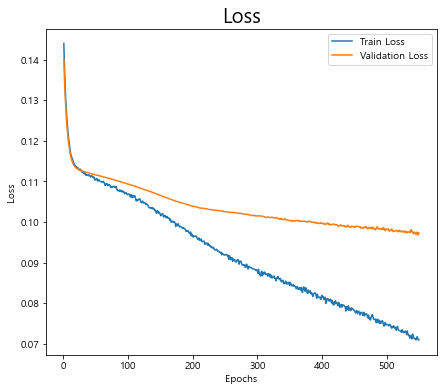

In [825]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

In [802]:
loss, acc = model.evaluate(test_dataset)

44/44 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.6987
